In [1]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
sns.set()


In [2]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

library = "https://kdl.bibliocommons.com/list/share/1709633629_kdl_earlyliteracy/1992750309_picture_books_for_grateful_readers"

response = get(library, headers=headers)

In [3]:
print(response)

print(response.text[:1000])

<Response [200]>
<!-- APPLICATION LAYOUT -->





<!DOCTYPE html>
<html xmlns:og="http://ogp.me/ns#" lang="en-US">
<head>
  <!-- Data Layer -->
<script>
  window.dataLayer = window.dataLayer || [{"bc.siteId":"MI-KENT-KDL","bc.libraryId":174,"bc.localBranch":null,"bc.shortName":"KDL","bc.longName":"Kent District Library","bc.domain":"kdl","bc.externalGaId":"UA-1801889-1","bc.gaCrossDomainNames":[],"bc.gaCrossDomainEnabled":true,"bc.cmsEnabled":true,"bc.cmsUrl":"https://kdl.org","bc.crazyEggId":"00178067","bc.allowGoogleAdFeatures":false,"bc.product":"core","bc.branch":null,"bc.version":"Version 9.3.4 Last updated 2021/11/09 12:49 [cor-liv-app19]"}];
</script>
<!-- end Data Layer -->
<!-- Start Google Tag Manager-->
<script>(function(w,d,s,l,i)
{
  w[l]=w[l]||[];w[l].push({'gtm.start': new Date().getTime(),event:'gtm.js'});
  
  var f=d.getElementsByTagName(s)[0], j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';
  
  j.async=true;
  j.src='https://www.googletagmanager.com/gtm.js?id='+i

In [4]:
html_soup = BeautifulSoup(response.text, 'html.parser')

results = html_soup.find('div', class_="row body_block")
# print(results.prettify())

book_elements = results.find_all('div', class_="listItem bg_white col-xs-12")

# def save_html(html, path):
#     with open(path, 'wb') as f:
#         f.write(html)
# save_html(r.content, 'KDL Library')

In [5]:
for book_element in book_elements:
    title_element = book_element.find('div', class_="list_item_title")
    author_element = book_element.find('div', class_="list_item_author")
    format_element = book_element.find('div', class_="list_item_format")
    available_element = book_element.find('span', class_="label availability")
    print(title_element)
    print(author_element)
    print(format_element)
    print(available_element)
    print()



<div class="list_item_title">
<a data-analytics='{"event":"bc.clickOnBibTitleLink","payload":{"gtmCategory":"v2-page-interactions","gtmAction":"v2-title-click","gtmLabel":"bib-title","gtmValue":1}}' href="/item/show/749994174">What I Like Most</a>
</div>
<div class="list_item_author">
            by <a data-analytics='{"event":"bc.clickOnAuthorLink","payload":{"gtmCategory":"v2-page-interactions","gtmAction":"v2-link-click","gtmLabel":"bib-author","gtmValue":1}}' href="/search?q=%22Murphy%2C+Mary%22&amp;search_category=author&amp;t=author" target="_parent" testid="author_search">Murphy, Mary</a>
<br/>
</div>
<div ?="" class="list_item_format">
<i aria-hidden="true" class="icon-book-open"></i>
          Picture Book - 2020<br/>
</div>
<span class="label availability">
<span class="item_available" role="presentation" testid="item_availability">Available </span>
<a class="circInfo value underlined location_info" data-analytics='{"event":"bc.checkAvailability","payload":{"gtmCategory":"v2-

In [6]:

for book_element in book_elements:
    title_element = book_element.find('div', class_="list_item_title")
    author_element = book_element.find('div', class_="list_item_author")
    format_element = book_element.find('div', class_="list_item_format")
    available_element = book_element.find('span', class_="label availability")
    print(title_element.text)
    print(author_element.text)
    print(format_element.text)
    print(available_element.text)
    print()



What I Like Most


            by Murphy, Mary




          Picture Book - 2020


Available 
in some locations



Look and Be Grateful


            by DePaola, Tomie




          Board Book - 2019


Available 
in some locations



The Thank You Book


            by Ray, Mary Lyn




          Picture Book - 2018


All copies in use 
Availability details



Thank You Bees


            by Yuly, Toni




          Board Book - 2020


Available 
in some locations



Apple Cake


            by Casey, Dawn




          Picture Book - 2019


All copies in use 
Availability details



Thankful


            by Spinelli, Eileen




          Picture Book - 2015


All copies in use 
Availability details



Sometimes It's Hard to Be Nice


            by Rudd, Maggie




          Picture Book - 2021


Available 
in some locations



Bear Says Thanks


            by Wilson, Karma




          Picture Book - 2012


All copies in use 
Availability details



All of Me!


            by Ba

In [7]:
for book_element in book_elements:
    title_element = book_element.find('div', class_="list_item_title")
    author_element = book_element.find('div', class_="list_item_author")
    format_element = book_element.find('div', class_="list_item_format")
    available_element = book_element.find('span', class_="label availability")
    print(title_element.text.strip())
    print(author_element.text.strip())
    print(format_element.text.strip())
    print(available_element.text.strip())
    print()

What I Like Most
by Murphy, Mary
Picture Book - 2020
Available 
in some locations

Look and Be Grateful
by DePaola, Tomie
Board Book - 2019
Available 
in some locations

The Thank You Book
by Ray, Mary Lyn
Picture Book - 2018
All copies in use 
Availability details

Thank You Bees
by Yuly, Toni
Board Book - 2020
Available 
in some locations

Apple Cake
by Casey, Dawn
Picture Book - 2019
All copies in use 
Availability details

Thankful
by Spinelli, Eileen
Picture Book - 2015
All copies in use 
Availability details

Sometimes It's Hard to Be Nice
by Rudd, Maggie
Picture Book - 2021
Available 
in some locations

Bear Says Thanks
by Wilson, Karma
Picture Book - 2012
All copies in use 
Availability details

All of Me!
by Bang, Molly
Picture Book - 2009
Available 
in some locations

Lala's Words
by Zhang, Gracey
Picture Book - 2021
Available 
in some locations

The Thankful Book
by Parr, Todd
Board Book - 2018
Available 
in some locations

A Small Kindness
by McAnulty, Stacy
Picture Book - 

In [8]:
picture_books = results(text=lambda t: "Picture Book" in t)
print(len(picture_books))

10


In [9]:
board_book = results(text=lambda t: "Board Book" in t)
print(len(board_book))

3


In [10]:
available_books = results(text=lambda t: "Available" in t)
print(len(available_books))


8


In [13]:
books = []

# Stripping the strings of unnecessary characters \r\n
for item in book_elements:
    try:
        title = item.contents[1].find_all("div",{"class":"list_item_title"})[0].text.strip()
    except:
        title = ''

    try:
        author = item.contents[1].find_all("div", {"class":"list_item_author"})[0].text.strip()
    except:
        author = ''

    try:
        book_format = item.contents[1].find_all("div", {"class": "list_item_format"})[0].text.strip()
    except:
        genre = ''

    # try:
    #     availability = item.contents.find_all("span", {"class": "label availability"})[0].text
    # except:
    #     availability = ''

    bookinfo=[title, author, book_format]
    books.append(bookinfo)

header = ['Title', 'Author', 'Book Format']

with open('books.csv', 'a') as file:
    writer=csv.writer(file)
    writer.writerow(i for i in header)
    for row in books:
        writer.writerow(row)

In [35]:
csv_file = 'books.csv'
df = pd.read_csv(csv_file)

# Replace the year digits inside of Book Format column
df['Book Format'] = df['Book Format'].str.replace('\d+','')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        13 non-null     object
 1   Author       13 non-null     object
 2   Book Format  13 non-null     object
 3   Year         13 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 544.0+ bytes


<ipython-input-35-6468b87b99d2>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Book Format'] = df['Book Format'].str.replace('\d+','')


,Title,Author,Book Format,Year
0,What I Like Most,"by Murphy, Mary",Picture Book -,2020
1,Look and Be Grateful,"by DePaola, Tomie",Board Book -,2019
2,The Thank You Book,"by Ray, Mary Lyn",Picture Book -,2018
3,Thank You Bees,"by Yuly, Toni",Board Book -,2020
4,Apple Cake,"by Casey, Dawn",Picture Book -,2019


L:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


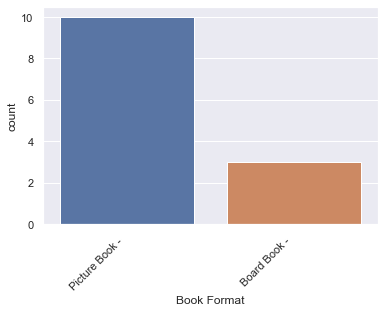

In [33]:
ax = sns.countplot(df['Book Format'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
plt.xlabel('Book Format')
plt.show()

L:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


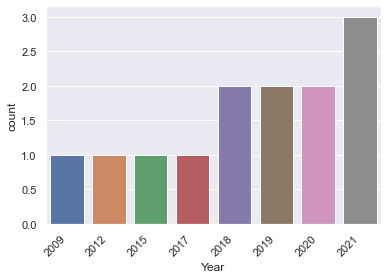

In [36]:
ax = sns.countplot(df['Year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
plt.xlabel('Year')
plt.show()